In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# define global varible for the game
gridrows = np.linspace( 100.0,   5.0, 20)   # rows i of the grid are sigma, std. dev.
gridcols = np.linspace(-100.,  100.0, 21)   # columns j of the grid are mu, mean (location)
nrows    = len(gridrows)
ncols    = len(gridcols)

In [3]:
# pub solution copy from the student-game.py
def probdist_beginner(X, sigma, mu_values=gridcols):
    """ 
    Given an ndarray X_1..X_n, and a known sigma;
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X,sigma) for each column.
    """
    xbar = np.mean(X)
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= sigma / np.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

def probdist_advanced(X, mu_values=gridcols):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X) for each column.
    """
    xbar = np.mean(X)
    s    = np.std(X, ddof=1)     # note that numpy.sd() by default calculates a population std dev; to get sample std. dev., set ddof=1
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= s / np.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

In [4]:
def beginner(X, sigma): 
    """
    the beginner's function will calculae the possibility for each mu in the grid 
    in a normal distuibution to the real mu. the result of each mu will be returned
    as a list
    input: X (list) guess data
           sigma: true sigma
    output: p_mu_X (list) list of distruibution for each guessed mu
    """
    n = np.size(X)
    p_X_mu = [np.prod(stats.norm.pdf(X, loc=mu, scale=sigma)) for mu in gridcols]
    p_X_mu_sum = np.sum(p_X_mu)
    p_mu_X = [p/p_X_mu_sum for p in p_X_mu]
    return p_mu_X

In [5]:
def advance(X):
    """
    the advance's function will calculae the possibility for each mu and for each sigma 
    in the grid as a normal distuibution to the real mu and sigma. the result of each mu 
    and sigma will be returned as a 2D list, with each entry to P of mu for one given sigma

    input: X (list) guess data
    output: p_mu_X (2d list) list of distruibution for each guessed mu and sigma
    """
    n = np.size(X)
    p_mu_X = []
    for sigma in gridrows: 
        each_sigma = [np.prod(stats.norm.pdf(X, loc=mu, scale=sigma)) for mu in gridcols]
        p_mu_X.append(each_sigma)
    p_X_mu_sum = np.sum(p_mu_X)
    p_mu_X_normal = p_mu_X / p_X_mu_sum
    return p_mu_X_normal

In [6]:
# use the semilog to plot the result form mine and pub's
def plot_distribution(Prob1, Prob2, label_num=0):
    if label_num == 0:
        label = 'beginner'
    elif label_num == 1:
        label = 'advance marginalized'
    f, (ax1, ax2) = plt.subplots(2,1, sharey=True)  # figure consists of 2 graphs, 2 rows x 1 col

    ax1.semilogy(gridcols, Prob1, label='my'+label)
    ax1.xaxis.set_ticks(gridcols)
    ax1.set(xlabel='$\mu$', ylabel='$P(\mu \mid)$')
    ax1.legend(loc="best")

    ax2.semilogy(gridcols, Prob2, color='orange', label="pub" + label)
    ax2.xaxis.set_ticks(gridcols)
    ax2.set(xlabel='$\mu$', ylabel='$P(\mu)$')
    ax2.legend(loc="best")
    plt.show()


In [7]:
# heatmap plot form the given script
def plot_heatmap(data):
    # Format axis labels as strings, with values as "10" not "10.0" for clarity, space
    xlabels = [ "{0:.0f}".format(val) for val in gridcols ]
    ylabels = [ "{0:.0f}".format(val) for val in gridrows ]

    # the Seaborn "heatmap" plot
    # with some examples of how it can be customized.
    #
    ax = sns.heatmap(data,                 # takes a 2D array of data
                    xticklabels=xlabels,  #   ... set custom x axis labels
                    yticklabels=ylabels,  #   ... set custom y axis labels
                    cbar=True,           #   ... turn off the default color scale bar
                    square=True,          #   ... force the plot to be square
                    linecolor='grey',     #   ... set grid line color
                    linewidth=0.5,)        #   ... set grid line width)          

    # now we have an Axes object that Seaborn returned to us,
    # and we can do additional customization, like...

    ax.set(xlabel='$\mu$',                 # ...set X axis label, using LaTeX formatting
        ylabel='$\sigma$')              # ...and Y axis label
    for label in ax.get_yticklabels():    
        label.set_size(10)                 # ... and font size on y-axis tick labels
    for label in ax.get_xticklabels():    
        label.set_size(10)                 # ... and on x-axis tick labels
    return 0

### Question 1: the beginner's game

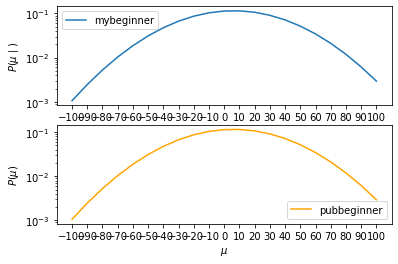

In [8]:
X = [11.50, -2.32, 9.18]
true_sigma = 60
p_mu_X = beginner(X, true_sigma)
pub_beginner = probdist_beginner(X, true_sigma)
plot_distribution(p_mu_X, pub_beginner)

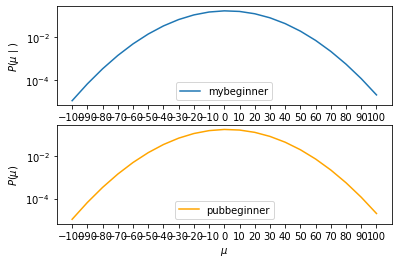

In [9]:
X = [15, 0, -10]
true_sigma = 40
p_mu_X = beginner(X, true_sigma)
pub_beginner = probdist_beginner(X, true_sigma)
plot_distribution(p_mu_X, pub_beginner)

### Answer to Question 1:  
the beginner patter of mine and the student overlaps no matter of the given dataset or true sigma
the fact is run on possibility on given data set is the same as run on given mu for a given sigma
or standard devation. 

### Question 2: the advance game

0

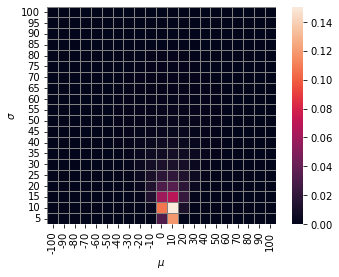

In [10]:
X = [11.50, -2.32, 9.18]
p_mu_X_advance = advance(X)
student_advance = probdist_advanced(X)
plot_heatmap(p_mu_X_advance)

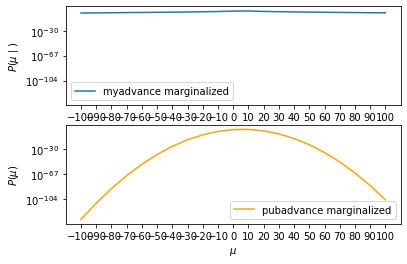

In [11]:
np_p_mu_X_advance = np.array(p_mu_X_advance)
p_mu_X_advance_marg = [np.sum(np_p_mu_X_advance[:, i]) for i in range(len(np_p_mu_X_advance[0]))]
plot_distribution(p_mu_X_advance_marg, student_advance,label_num=1)

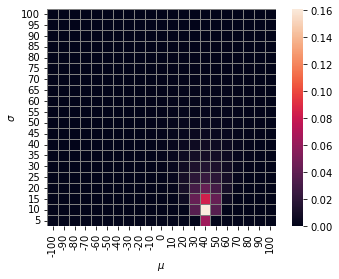

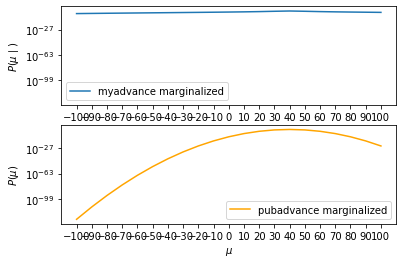

In [12]:
# change the input guess data
X = [50, 40, 30]
p_mu_X_advance = advance(X)
student_advance = probdist_advanced(X)
plot_heatmap(p_mu_X_advance)
np_p_mu_X_advance = np.array(p_mu_X_advance)
p_mu_X_advance_marg = [np.sum(np_p_mu_X_advance[:, i]) for i in range(len(np_p_mu_X_advance[0]))]
plot_distribution(p_mu_X_advance_marg, student_advance,label_num=1)

### Answer to question 2:
the heat map can show grid with the highest possibility with mu and sigma of the advance's method and the marginalized data shows difference. 

### Question 3:
1. my method have a larger freedom in chosing sigma (not limited to the std from the sample data set), which allows student to explore more in terms of deviation. that gives a 2D plot over an 1d, which gives a more procise value.
2. the pub's solution gives very low possibility at the edge of the grid but the advance's method suggests it may not be true. so betting on the edge is giving me advantage because the pub is not going to bet on those due to the low possibility